## **COVID-19 - Pandemic in India!**
This is the part 1. This is Data analysis and data visualization part, I am going to explore the COVID situation in India.

Task that I am going to perform:

*   Scrape out the COVID-19 Data from Ministry of Health and Family Welfare Government of India websites
*   Analysing the data and fetching information from the data
*   Figure out the death rate and cure rate per 100 across the affected states
*   Using GeoPandas and Matplotlib, Visualizing Covid-19 Confirmed cases statewise.

In [1]:
# importing the required libraries
import pandas as pd

# Visualisation libraries
import matplotlib.pyplot as plt
%matplotlib inline

# Disable warnings 
import warnings
warnings.filterwarnings('ignore')

# for date and time opeations
from datetime import datetime
# for file and folder operations
import os
# for regular expression opeations
import re
# for listing files in a folder
import glob
# for getting web contents
import requests 
# for scraping web contents
from bs4 import BeautifulSoup

In [2]:
# get data

DataLink = 'https://www.mohfw.gov.in/'
req = requests.get(DataLink)
# parse web data
soup = BeautifulSoup(req.content, "html.parser")

In [3]:
#thead is used to get table head taking -1 since my target table is the last table in the page
thead = soup.find_all('thead')[-1]
#get rows from table head
head = thead.find_all('tr')
#get the tbody it contains the contents
tbody = soup.find_all('tbody')[-1]
#get all the contents from rows in the table body
#each row contains each entry of the state
body = tbody.find_all('tr')

In [4]:
#Fetching Table contents
#=======================

head_rows = []
body_rows = []

#Appending each row from head to head_rows
for tr in head:
    td = tr.find_all(['th', 'td'])
    row = [i.text for i in td]
    head_rows.append(row)

#Appending each row from body to body_rows
for tr in body:
    td = tr.find_all(['th', 'td'])
    row = [i.text for i in td]
    body_rows.append(row)


In [5]:
#save contents in the DataFrame
#==============================
    
# skip last 6 rows, it contains unwanted info
# head_rows contains column title
df_bs = pd.DataFrame(body_rows[:len(body_rows)-6],columns=head_rows[0])         
# Drop 'S. No.' column
df_bs.drop('S. No.', axis=1, inplace=True)
# Showing Table in which Covid-19 Data given statewise
df_bs

,Name of State / UT,Active Cases*,Cured/Discharged/Migrated*,Deaths**,Total Confirmed cases*
0,Andaman and Nicobar Islands,11,33,0,44
1,Andhra Pradesh,3244,3509,88,6841
2,Arunachal Pradesh,88,7,0,95
3,Assam,2145,2166,8,4319
4,Bihar,2093,4644,41,6778
5,Chandigarh,50,302,6,358
6,Chhattisgarh,736,1036,9,1781
7,Dadra and Nagar Haveli and Daman and Diu,36,9,0,45
8,Delhi,26351,16500,1837,44688
9,Goa,544,85,0,629


### **Data Cleaning**

In this section I am going to perform some following operations to clean the data:
*  Making a copy of Data
*  Changing the name of columns 
*  There are some symbols which I am going to remove in this section
*  Finding if there is any missing values and if present then filling or removing those values

In [6]:
#saving a copy of the dataframe
df_India = df_bs.copy()
# remove extra characters from 'Name of State/UT' column
df_India['Name of State / UT'] = df_India['Name of State / UT'].str.replace('#', '')
df_India['Deaths**'] = df_India['Deaths**'].str.replace('#', '')

In [7]:
# Rename the columns
df_India = df_India.rename(columns={'Name of State / UT' : 'State/UnionTerritory','Active Cases*':'Active cases', 'Cured/Discharged/Migrated*':'Cured','Deaths**':'Deaths',
                                    'Total Confirmed cases*':'Confirmed'})
df_India.head(36)


,State/UnionTerritory,Active cases,Cured,Deaths,Confirmed
0,Andaman and Nicobar Islands,11,33,0,44
1,Andhra Pradesh,3244,3509,88,6841
2,Arunachal Pradesh,88,7,0,95
3,Assam,2145,2166,8,4319
4,Bihar,2093,4644,41,6778
5,Chandigarh,50,302,6,358
6,Chhattisgarh,736,1036,9,1781
7,Dadra and Nagar Haveli and Daman and Diu,36,9,0,45
8,Delhi,26351,16500,1837,44688
9,Goa,544,85,0,629


In [8]:
# number of missing values 
df_India.isna().sum()

State/UnionTerritory    0
Active cases            0
Cured                   0
Deaths                  0
Confirmed               0
dtype: int64

In [26]:
# saving data
# ===========

# today's date
now  = datetime.now()
# file names as year-month-day.csv format
file_name = now.strftime("%Y_%m_%d")+' - COVID-19_India.csv'

# location for saving the file
file_loc = '/content/'

# save file as a scv file
df_India.to_csv(file_loc + file_name, index=False)

In [27]:
# rename state/UT names
df_India['State/UnionTerritory'].replace('Chattisgarh', 'Chhattisgarh', inplace=True)
df_India['State/UnionTerritory'].replace('Pondicherry', 'Puducherry', inplace=True) 

In [28]:
# complete data info
df_India.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   State/UnionTerritory  35 non-null     object
 1   Active cases          35 non-null     object
 2   Cured                 35 non-null     object
 3   Deaths                35 non-null     object
 4   Confirmed             35 non-null     object
dtypes: object(5)
memory usage: 1.5+ KB


In [70]:
#Making copy of the data sets and conveting values into integers
df = df_India.copy()
df['Confirmed'] = df['Confirmed'].apply(lambda x: int(x))
df['Active cases'] = df['Active cases'].apply(lambda x: int(x))
df['Cured'] = df['Cured'].apply(lambda x: int(x))
df['Deaths'] = df['Deaths'].apply(lambda x: int(x))

## Analysing COVID19 Cases in India

In [30]:
total_cases = df['Confirmed'].sum()
print('Total number of confirmed COVID 2019 cases across India till date (14th June, 2020):', total_cases)

Total number of confirmed COVID 2019 cases across India till date (14th June, 2020): 345792


In [31]:
#highlight the dataframe
df.style.background_gradient(cmap='Greens')

,State/UnionTerritory,Active cases,Cured,Deaths,Confirmed
0,Andaman and Nicobar Islands,11,33,0,44
1,Andhra Pradesh,3244,3509,88,6841
2,Arunachal Pradesh,88,7,0,95
3,Assam,2145,2166,8,4319
4,Bihar,2093,4644,41,6778
5,Chandigarh,50,302,6,358
6,Chhattisgarh,736,1036,9,1781
7,Dadra and Nagar Haveli and Daman and Diu,36,9,0,45
8,Delhi,26351,16500,1837,44688
9,Goa,544,85,0,629


In [32]:
today = now.strftime("%Y_%m_%d")
total_cured = df['Cured'].sum()
print("Total people who were cured as of "+today+" are: ", total_cured)
total_cases = df['Confirmed'].sum()
print("Total people who were detected COVID+ve as of "+today+" are: ", total_cases)
total_death = df['Deaths'].sum()
print("Total people who died due to COVID19 as of "+today+" are: ",total_death)
total_active = total_cases-total_cured-total_death
print("Total active COVID19 cases as of "+today+" are: ",total_active)

Total people who were cured as of 2020_06_17 are:  186935
Total people who were detected COVID+ve as of 2020_06_17 are:  345792
Total people who died due to COVID19 as of 2020_06_17 are:  11903
Total active COVID19 cases as of 2020_06_17 are:  146954


In [33]:
#Total Active  is the Total cases - (Number of death + Cured)
total_active = df['Active cases'].sum()
print('Total number of active COVID 2019 cases across India:', total_active)
Tot_Cases = df.groupby('State/UnionTerritory')['Active cases'].sum().sort_values(ascending=False).to_frame()
Tot_Cases.style.background_gradient(cmap='RdPu')

Total number of active COVID 2019 cases across India: 146954


,Active cases
State/UnionTerritory,
Maharashtra,50057
Delhi,26351
Tamil Nadu,20709
Gujarat,5962
West Bengal,5386
Uttar Pradesh,5064
Haryana,4406
Andhra Pradesh,3244
Rajasthan,3059


In [110]:
import numpy as np
state_cases = df.groupby('State/UnionTerritory')['Confirmed',"Active cases",'Deaths','Cured'].max()

#state_cases = state_cases.astype({'Deaths': 'int'})
state_cases["Death Rate (per 100)"] = np.round(100*state_cases["Deaths"]/state_cases["Confirmed"],2)
state_cases["Cure Rate (per 100)"] = np.round(100*state_cases["Cured"]/state_cases["Confirmed"],2)
state_cases.sort_values('Confirmed', ascending= False).fillna(0).style.background_gradient(cmap='GnBu',subset=["Confirmed"])\
                        .background_gradient(cmap='GnBu',subset=["Deaths"])\
                        .background_gradient(cmap='GnBu',subset=["Cured"])\
                        .background_gradient(cmap='GnBu',subset=["Active cases"])\
                        .background_gradient(cmap='GnBu',subset=["Death Rate (per 100)"])\
                        .background_gradient(cmap='GnBu',subset=["Cure Rate (per 100)"])

,Confirmed,Active cases,Deaths,Cured,Death Rate (per 100),Cure Rate (per 100)
State/UnionTerritory,,,,,,
Maharashtra,113445,50057,5537,57851,4.880000,50.990000
Tamil Nadu,48019,20709,528,26782,1.100000,55.770000
Delhi,44688,26351,1837,16500,4.110000,36.920000
Gujarat,24577,5962,1533,17082,6.240000,69.500000
Uttar Pradesh,14091,5064,417,8610,2.960000,61.100000
Rajasthan,13216,3059,308,9849,2.330000,74.520000
West Bengal,11909,5386,495,6028,4.160000,50.620000
Madhya Pradesh,11083,2455,476,8152,4.290000,73.550000
Haryana,8272,4406,118,3748,1.430000,45.310000


In [35]:
#install geopandas
pip install geopandas

In [171]:
import geopandas as gpd
shp_file ='/content/Indian_States.shp'
map_df = gpd.read_file(shp_file)
map_india = map_df
map_india['st_nm'].replace('NCT of Delhi', 'Delhi', inplace=True)
map_india.sort_values(by=['st_nm'],inplace=True)
map_india = map_india.drop(index = 7,axis = 0)
map_india = map_india.reset_index()
map_india.drop('index',axis=1,inplace=True)
map_india = pd.concat([map_india,df.iloc[:,4]],axis=1)

In [177]:
#Finding if there is any null values
map_india.isna().sum()

st_nm        0
geometry     0
Confirmed    0
dtype: int64

# Data Visualization using Matplotlib

Showing choropleth map of India showing Confirmed cases of Covid-19
It gives beautiful picture which state affects most

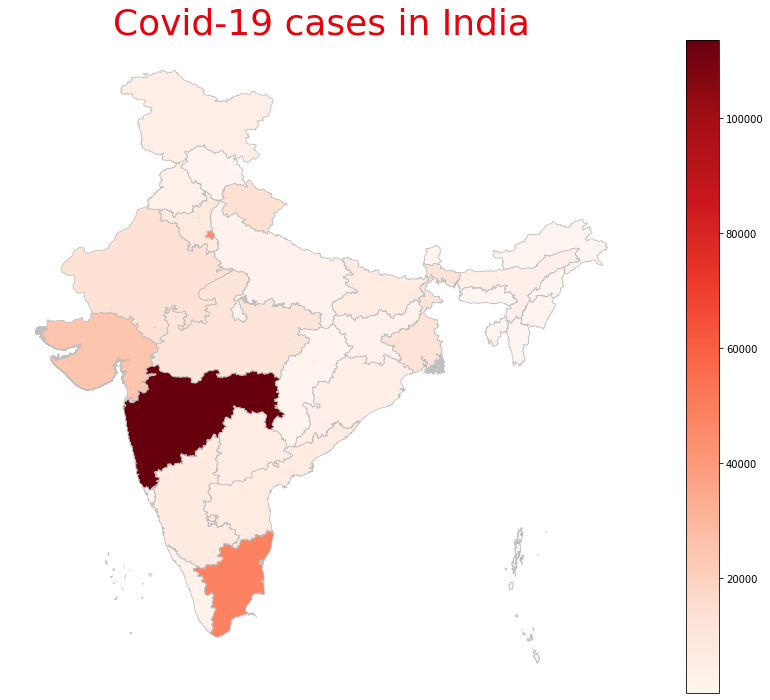

In [237]:
# create figure and axes for Matplotlib and set the title
fig, ax = plt.subplots(1, figsize=(18, 12))
ax.axis('off')
ax.set_title('Covid-19 cases in India', fontdict={'fontsize': '36', 'fontweight' : '5','color':'r'})

# plot the figure
map_india.plot(column='Confirmed', cmap='Reds', linewidth=0.8, ax=ax, edgecolor='.75', legend=True)

plt.show()

# Comparison Analyis using Data Visualization

In this section I draw a seaborn bar plot for comparing data of active cases and confirmed cases. This plot shows which state is really in bad situation because just having maximum no. of cases do not show the clear picture of the critical situation. For example, Tamilnadu is in 2nd position in terms of no. of confirmed cases but it has less no. of active cases than Delhi which means Delhi started getting new cases faster than TamilNadu. So we can say that Delhi's condition is more critical than TamilNadu.


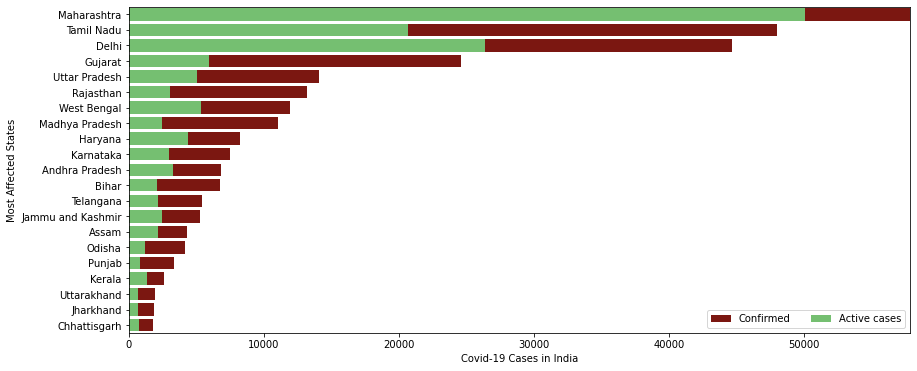

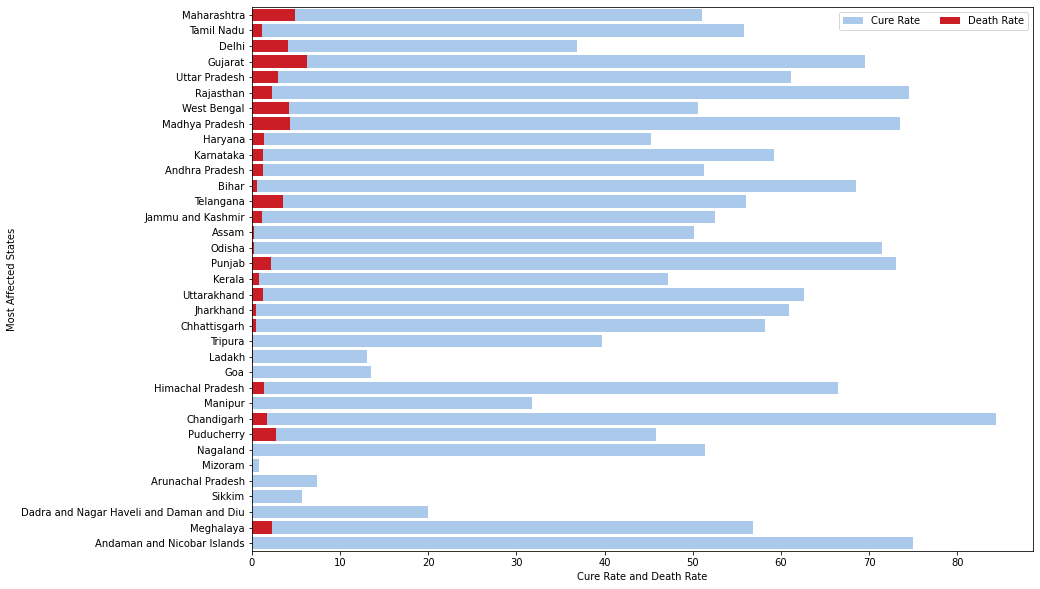

In [235]:
#Barplot using Seaborn
import seaborn as sns
Top_ten = state_cases.sort_values(by = ['Confirmed'],ascending=False)
Top_ten.reset_index(inplace = True)
fig1, ax1 = plt.subplots(1, figsize=(14, 6))
sns.set_color_codes("dark")
sns.barplot(x="Confirmed", y="State/UnionTerritory", data=Top_ten.iloc[:-14,:],
            label="Confirmed", color="r",ax = ax1)
sns.set_color_codes("muted")
sns.barplot(x="Active cases", y="State/UnionTerritory", data=Top_ten.iloc[:-14,:],
            label="Active cases", color="g",ax = ax1)
ax1.legend(ncol=2, loc="lower right", frameon=True,)
ax1.set(xlim=(0,Top_ten.iloc[0,4]),ylabel="Most Affected States",
       xlabel="Covid-19 Cases in India")

fig2, ax2 = plt.subplots(1, figsize=(14, 10))
sns.set_color_codes("pastel")
sns.barplot(x="Cure Rate (per 100)", y="State/UnionTerritory", data=Top_ten.iloc[:,:],
            label="Cure Rate", color="b",ax = ax2)
sns.set_color_codes("bright")
sns.barplot(x="Death Rate (per 100)", y="State/UnionTerritory", data=Top_ten.iloc[:,:],
            label="Death Rate", color="r",ax = ax2)
ax2.legend(ncol=2, loc="top right", frameon=True,)
ax2.set(ylabel="Most Affected States",
       xlabel="Cure Rate and Death Rate")
plt.show()